<a href="https://colab.research.google.com/github/ananya7rai/Breast-Cancer-Classification-and-Visualization/blob/main/BreastCancerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Identifying the Problem and cleaning the Data**


We chose the Brest Cancer (Wisconsin) Diagnosis dataset maintained by the University of California, Irvine.
+ It contains 569 samples of malignant and benign tumor cells.
+ The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively.
+ The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.


1.1 Loading libraries and setting options

In [1]:
import numpy as np
import pandas as pd

1.2 Loading Dataset and Inspecting the data

In [2]:
data = pd.read_csv('/content/data.csv', index_col = False,)
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [3]:
#data.drop('id', axis = 1, inplace = True)
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [4]:
data.shape

(569, 32)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [7]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

From the results above, the diagnosis is a categorical variable, as it represents a fix number of possible values (i.e Malignant, or Benign). The machine learning algorithms want numbers and not strings, as their inputs so we need some method of coding to convert them.

In [8]:
data.to_csv('/content/clean-data.csv')

Now we have a good intuitive sense of the data, next we will take a closer look at the attributes and data values. Here we will get familiar with the data, which will provide useful knowledge for data pre-processing.


**2. Exploratory Data Analysis**

Now we will explore and examine the data using two approaches - Descriptive Statistics and Visualization

2.2 Descriptive Statistics

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.stats import norm
import seaborn as sns

plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['axes.titlesize'] = 'large'

In [10]:
data = pd.read_csv('/content/clean-data.csv', index_col = False)
#data.drop('id', axis = 1, inplace = True)
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [11]:
data.describe()    #basic descriptive statistics

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
# Convert columns with 'M' to numeric, handling errors
data1 = data.copy()
for col in data1.columns:
    try:
        data1[col] = pd.to_numeric(data1[col], errors='coerce')
    except:
        print(f"Could not convert column {col}")
data1.skew()

id                         6.473752
diagnosis                       NaN
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1

In [13]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [14]:
# group by diagnosis and review the output
diag_gr = data.groupby('diagnosis', axis = 0)
pd.DataFrame(diag_gr.size(), columns = ['# of observations'])

,# of observations
diagnosis,
B,357
M,212


Here,
+ Malignant = 1(indicates presence of cancer cells)
+ Benign = 0(indicates absence of cancer cells)

**Observation**

212 observations indicating the presence of cancer cells and 357 show absence of cancer cells. Lets confirm this by plotting the histogram.

2.3 Unimodal Data Visualizations

One of the main goals of visualizing the data here is to observe which features are most helpful in predicting malignant or benign cancer. The other is to see general trends that may aid us in model selection and hyper parameter selection.


We will apply 3 techniques to understand each attribute of our dataset independently.
+ Histograms
+ Density Plots.
+ Box and Whisker Plots.

<ipython-input-15-3350c158e400>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['diagnosis'], label = 'Count', palette = "Set3")


<Axes: xlabel='count', ylabel='diagnosis'>

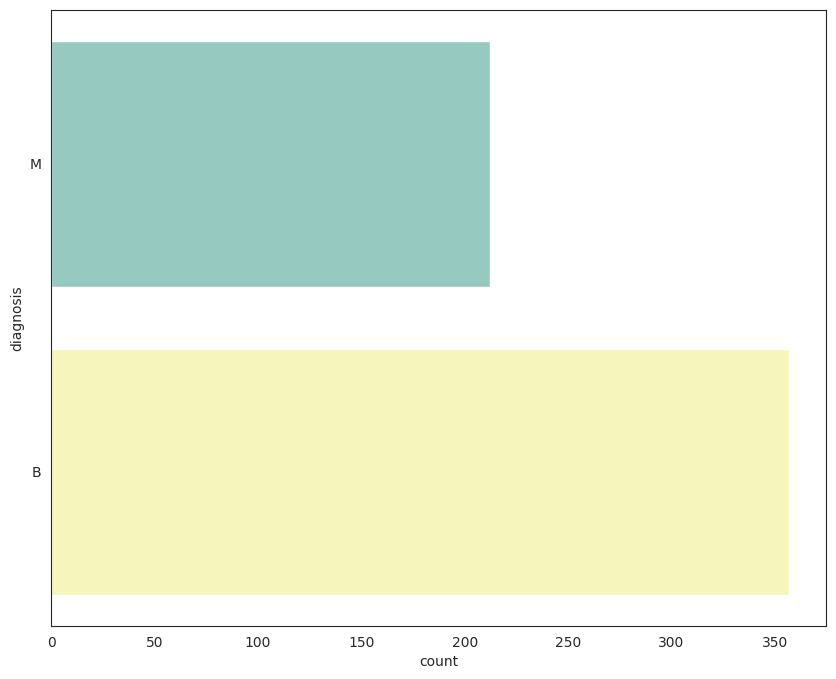

In [15]:
#lets get the frequency of cancer diagnosis
sns.set_style("white")
sns.set_context({"figure.figsize": (10,8)})
sns.countplot(data['diagnosis'], label = 'Count', palette = "Set3")

2.3.1 Visualizing distribution of data via Histograms

Separate columns into smaller dataframes to perform visualization

In [16]:
#Break up columns into groups, according to their suffix designation
#(_mean, _se,
# and __worst) to perform visualisation plots off.
#Join the 'ID' and 'Diagnosis' back on
data_id_diag = data.loc[:, ["id","diagnosis"]]
data_diag = data.loc[:, ["diagnosis"]]

#For a merge + slice
data_mean = data.iloc[:,1:12]
data_se = data.iloc[:, 12:23]
data_worst = data.iloc[:, 23:]

print(data_id_diag.columns)
print(data_mean.columns)
print(data_se.columns)
print(data_worst.columns)

Index(['id', 'diagnosis'], dtype='object')
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst'],
      dtype='object')
Index(['texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Histogram - the "_mean", "_se" and "_worst" suffix designation

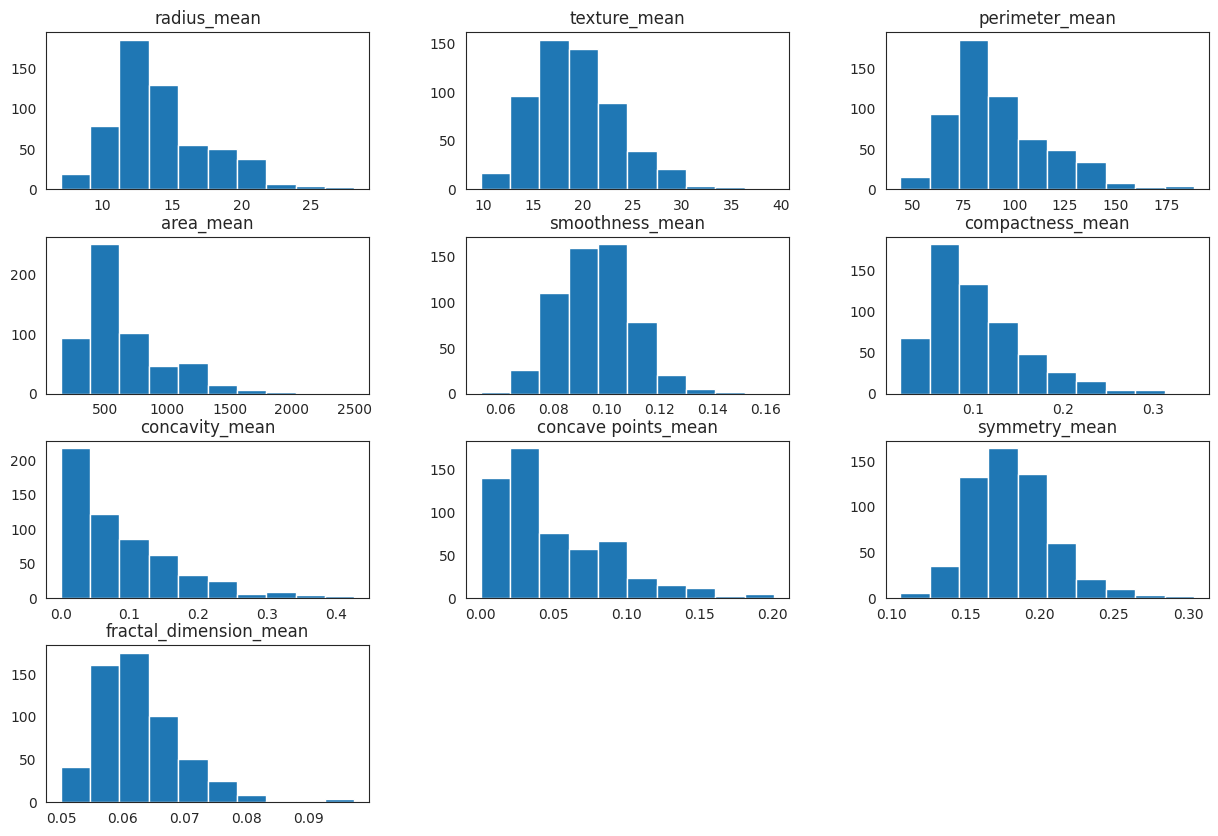

In [17]:
#Plot histograms of CUT1 variables
hist_mean = data_mean.hist(bins = 10, figsize = (15,10), grid = False,)

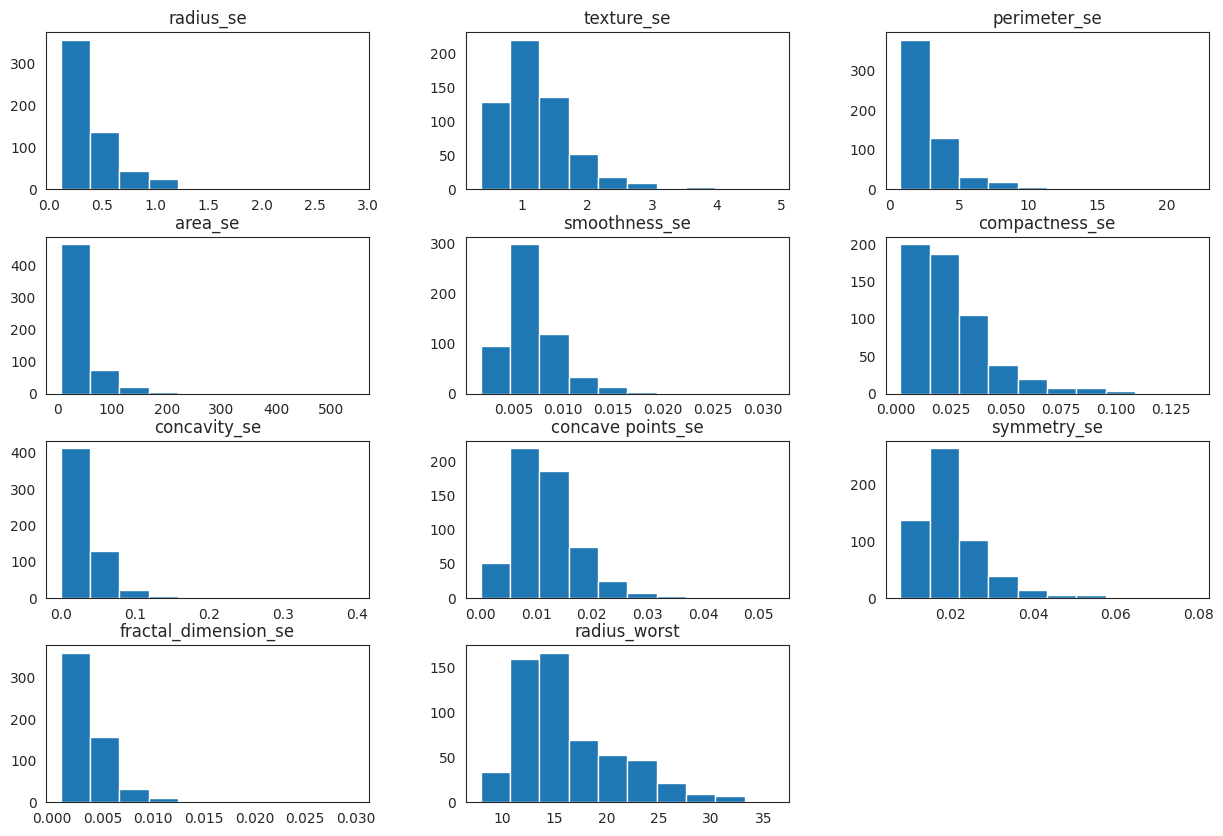

In [18]:
hist_se = data_se.hist(bins = 10, figsize = (15,10), grid = False,)

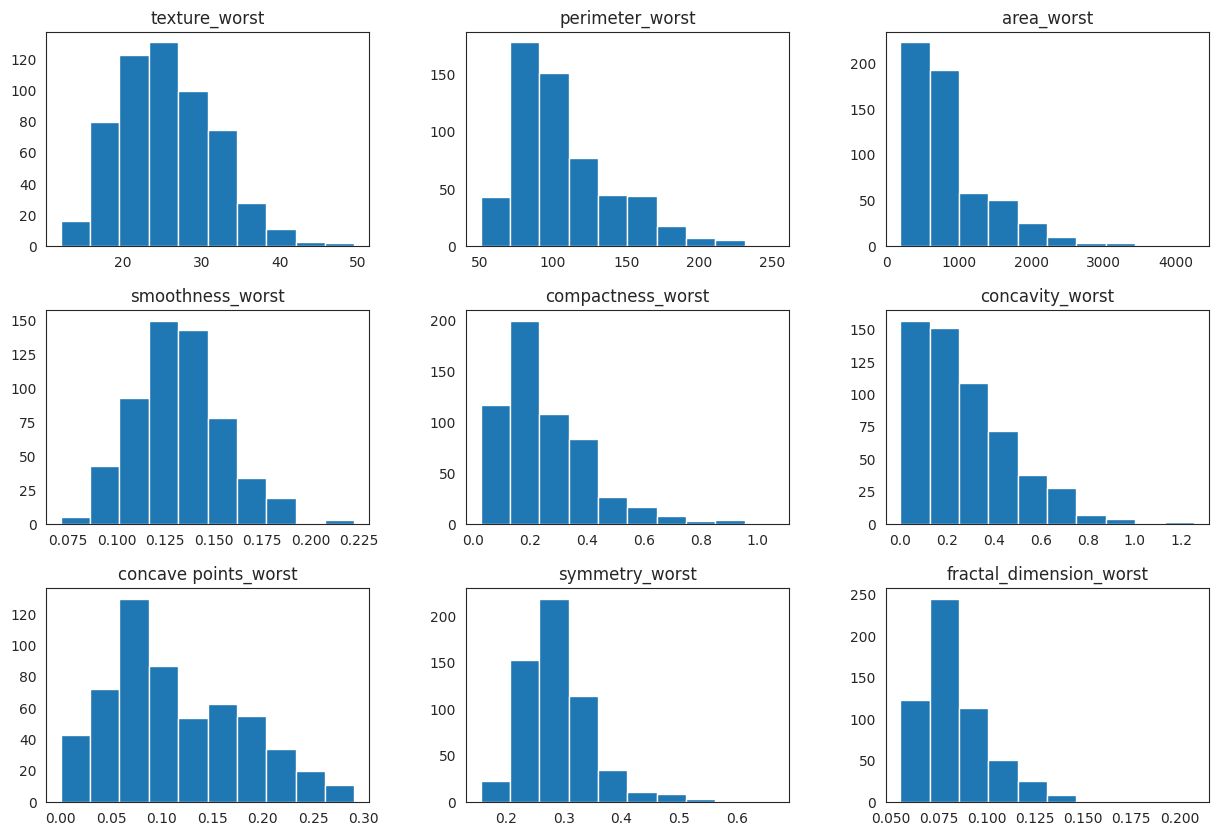

In [19]:
hist_worst = data_worst.hist(bins = 10, figsize = (15,10), grid = False,)

Observations
+ We can see that prhaps th attributes **concavity** and **concave points** may have an exponential distribution.
+ We can also see that perhaps the texture, smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting as many learning techniques assume a Gaussian univariate distribution on the input variables.

2.3.2 Visualizing distribution of data via density plots

Density plots - the "_mean", "_se" and "_worst" suffix designation

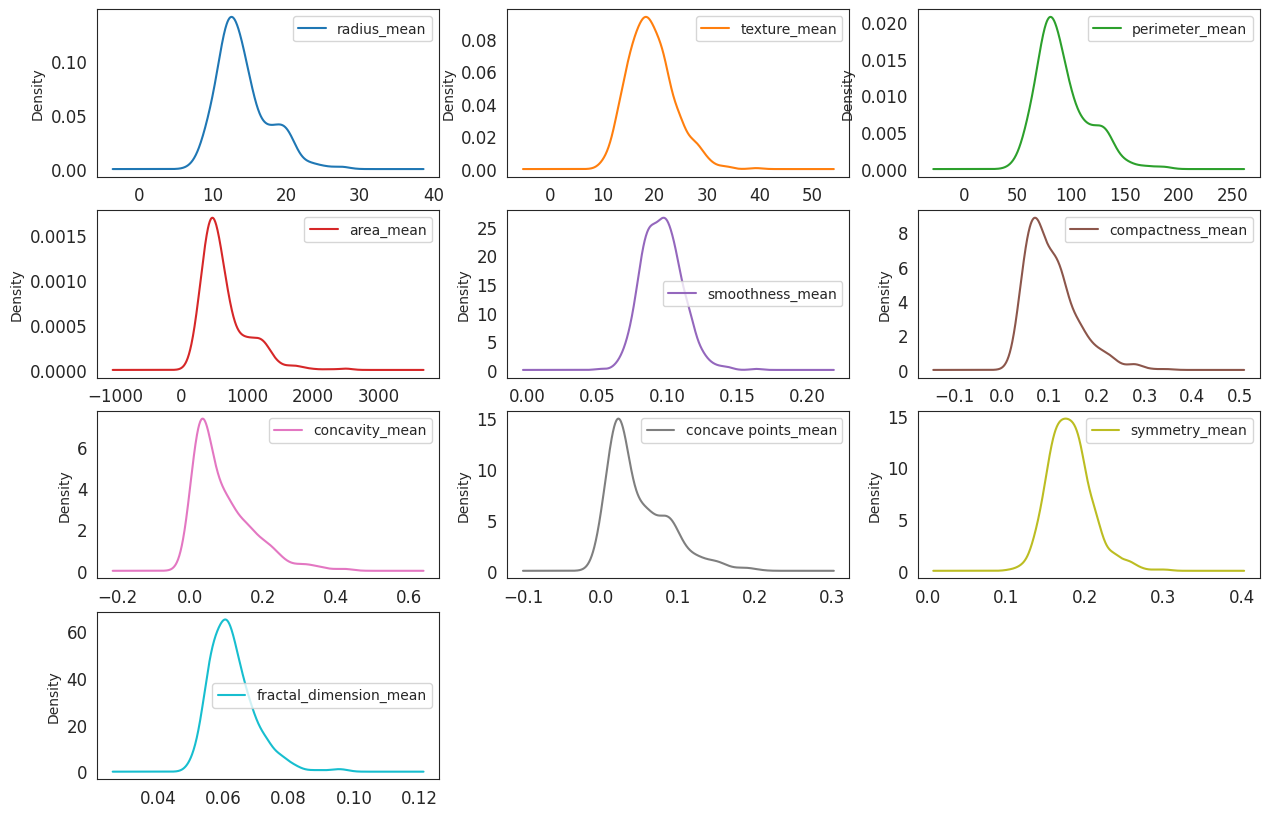

In [20]:
plt = data_mean.plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, sharey = False, fontsize = 12, figsize = (15,10))

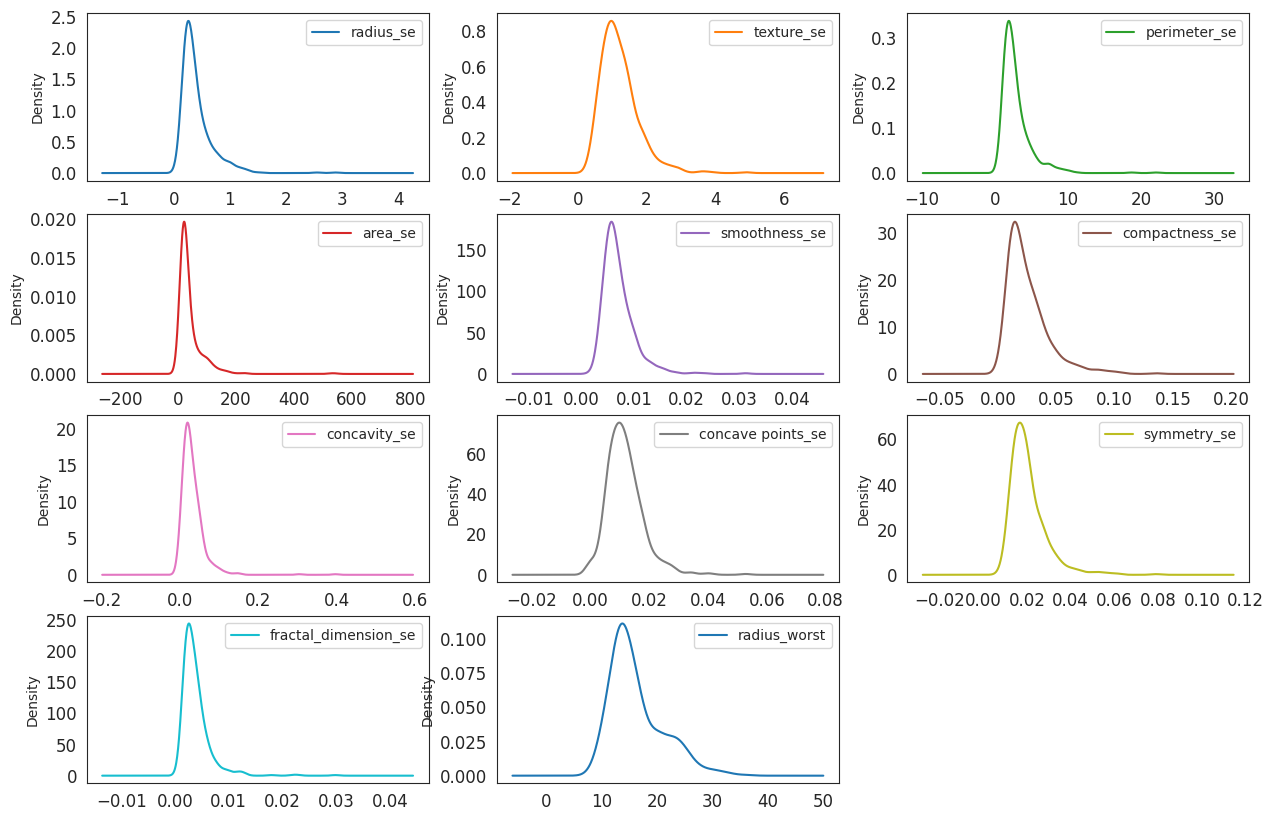

In [21]:
plt = data_se.plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, sharey = False, fontsize = 12, figsize = (15,10))

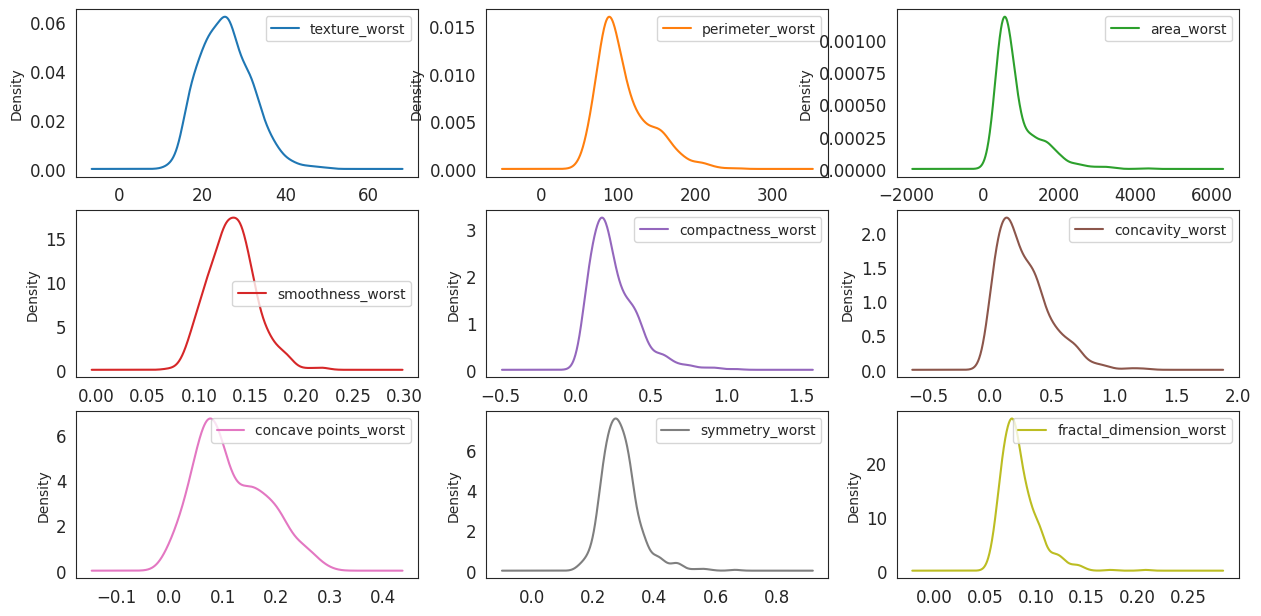

In [22]:
plt = data_worst.plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, sharey = False, fontsize = 12, figsize = (15,10))

Observations
+ We can see that perhaps the attributes parimeter, radius, area, concavity, and compactness may have an exponential distribution.
+ We can also see that perhaps the texture, smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution.


2.3.3 Visualizing distribution of data via box plots

Box plot - the "_mean", "_se" and "_worst" suffix designition


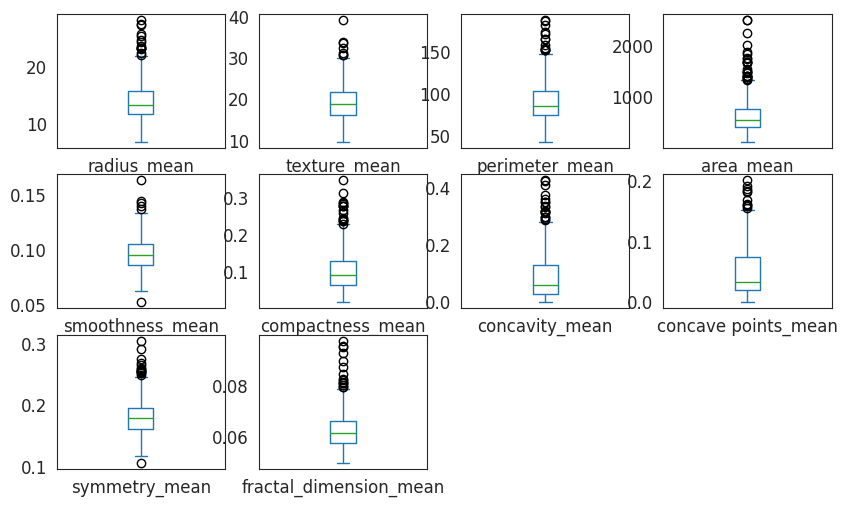

In [23]:
plt=data_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)


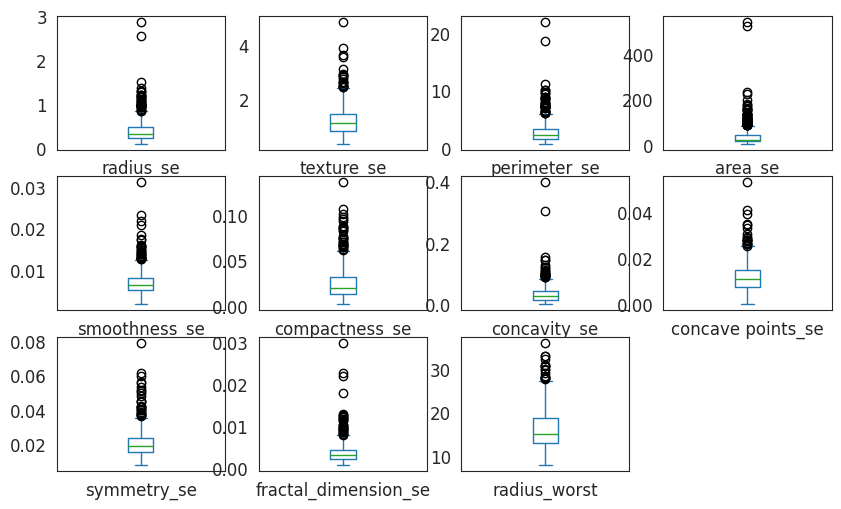

In [24]:
plt=data_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)


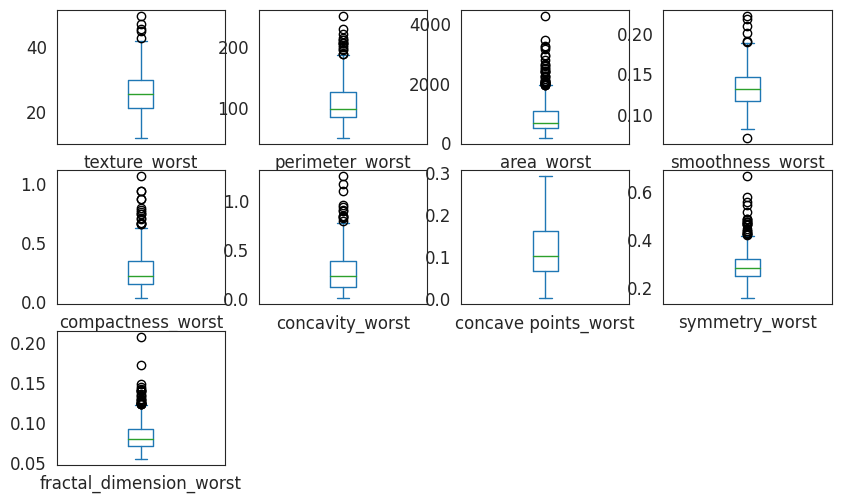

In [25]:
plt=data_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)


Observations

+ We can see that perhaps the attributes parimeter, radius, area, concavity, and compactness may have an exponential distribution.
+ We can also see that perhaps the texture, smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution.

2.4 Multimodal Data Visualizations

+ Correlation matrix
+ Scatter plots


2.4.1 Correlation Matrix

<Axes: title={'center': 'Brest Cancer Feature Correlation'}>

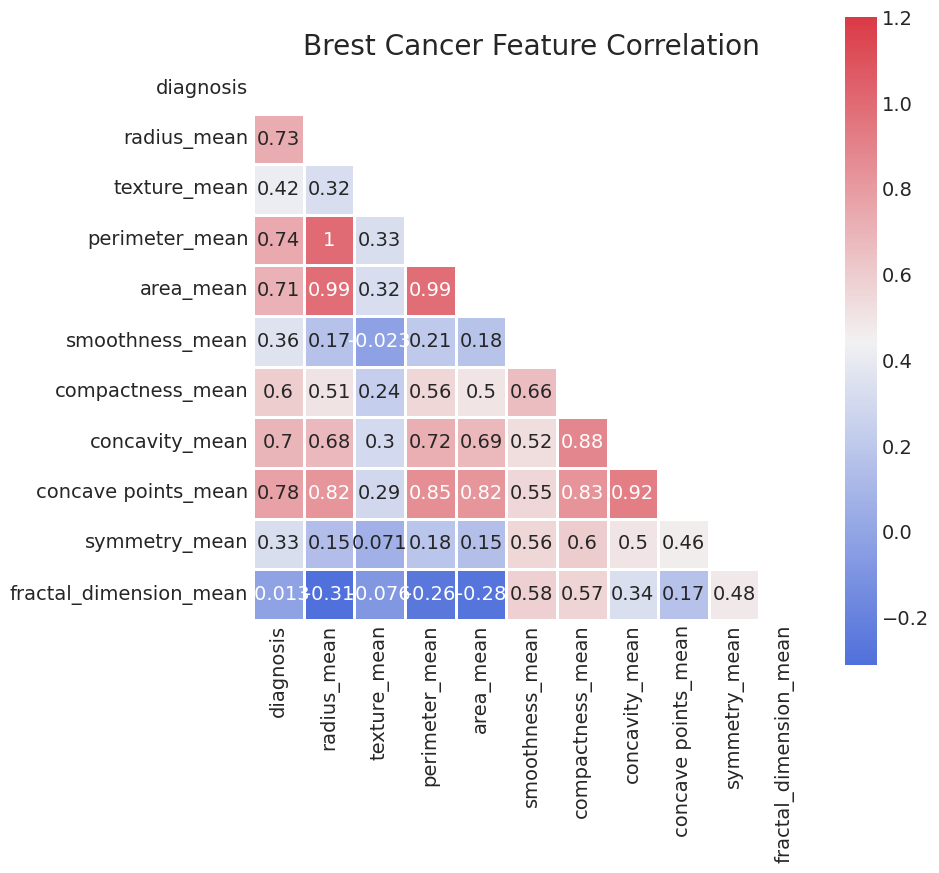

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('/content/clean-data.csv', index_col = False)
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.drop('diagnosis', axis = 1, inplace = True)
#compute the correlation matrix
# Convert 'diagnosis' column to numerical values if it exists
if 'diagnosis' in data_mean.columns:
    data_mean['diagnosis'] = data_mean['diagnosis'].map({'M': 1, 'B': 0})

corr = data_mean.corr()

#generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

#set up the matplotlib figure
data, ax = plt.subplots(figsize = (8,8))
plt.title('Brest Cancer Feature Correlation')

#generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap = True)

#Draw the heat map with the mask and correct aspect ratio
sns.heatmap(corr, vmax = 1.2, square = 'square', cmap = cmap, mask = mask, ax = ax, annot = True, fmt = '.2g', linewidths = 2)

Observation:

We can see strong positive relationship exists with mean values parameter between 1-0.75 (r) :
+ The mean area of the tissue nucleus has a strong positve correlation with mean values of radius and parameter.
+ Some parameters are moderately positive correlated (r between 0.5-0.75) are concavity and area, concavity and perimeter etc.
+ Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, parameter mean values.

2.4.2 Scatter Plot

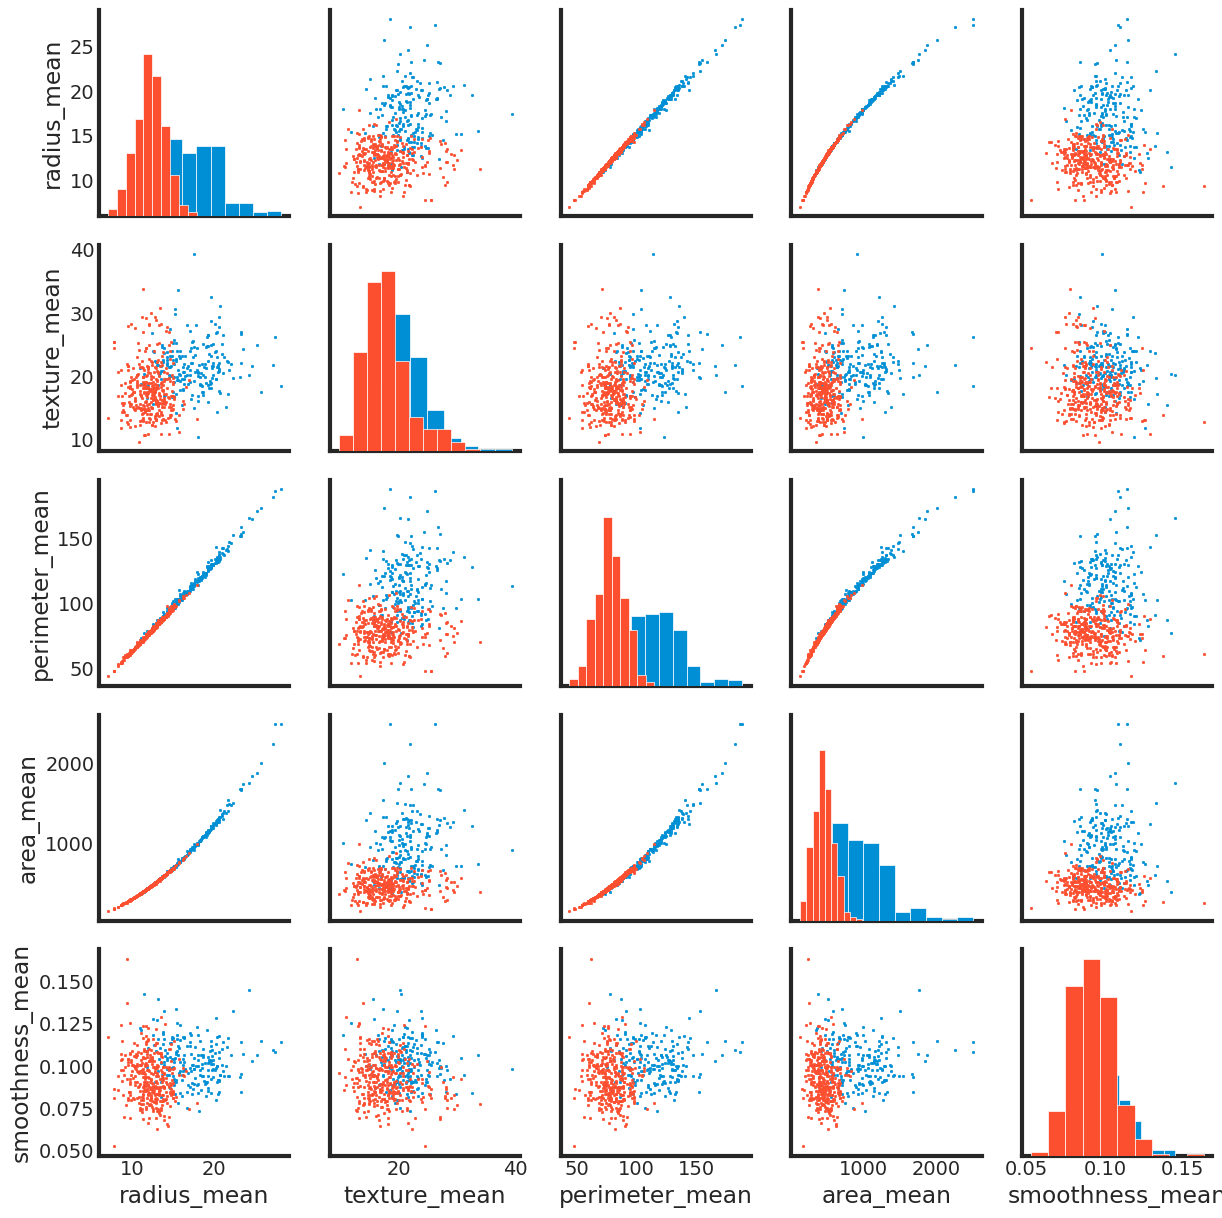

In [27]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('/content/clean-data.csv', index_col = False)
data.drop('id', axis = 1, inplace = True)

g = sns.PairGrid(data[[data.columns[1], data.columns[2], data.columns[3], data.columns[4], data.columns[5],data.columns[6]]], hue = 'diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

Summary
+ Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tend to show a correlation with malignant tumors.
+ Mean values of texture, smoothness, symmetry or fractal dimension does not show a particular preference of one diagnosis over the other.
+ In any of the histograms there is no noticeable large outliers that warrants further cleanup.

So far, we have explored the data, and gained insight on the distribution of the data as well as how the attributes correlate to each other. We identified some features of interest.

3. Pre-Processing the Data

This involves a number of activities such as :
+ Assigning numerical calues to categorical values,
+ Handling missing values, and
+ Normalizing the features (so that features on small scales so not dominate when fitting a model to the data).

Here, we will use feature selection to reduce high-dimension data, feature extraction and transformation for dimensionality reduction.

Lets find the most predictive feature of the data and filter it to enhance the predictive power of the analytics model.


In [28]:
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['axes.titlesize'] = 'large'

data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


3.1 Label Encoding

Here, we assign 30 features to a NumPy array X, and transform the class labels from their original string representation(M and B) into integers.

In [29]:
#Assigning predictors to a variable of ndarray(matrix) type
array = data.values
X = array[:, 1:31]
y = array[:, 0]

In [30]:
#transforming the class labels. from their original string representation (M and B ) into integers.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


After encoding the class labels(diagnosis) in an array y, the malignant tumors are now represented as class 1(i.e. presencse of cancer cells) and benign tumors are represented as class 0(i.e. no cancer cells detected), respectively, illustrated by calling the transform method of LabelEncoder on two dummy variables.

3.2 Assesing Model Accuracy: Splitting data into training and test sets

To evaluate the performance of a machine learning algorithm, we'll use different training and test datasets. Here, we will:
+ Split the available data into a training set and a testing set.(70% training and 30% testing; we can also use 67% for training and 33% for testing data as its more common, but it may depend on the size and specifics of our dataset),
+ Train the algorithm on the first part,
+ Make predictions on the second part and
+ Evaluate the predictions against the expected results.



In [31]:
from sklearn.model_selection import train_test_split

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((426, 30), (143, 30), (426,), (143,))

3.3 Feature Standardization
+ We'll use this technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.
+ We've seen earlier, during Exploratory Data Analysis, that the raw data has differing distributions which may have an impact on most ML algorithms. Most ML and optimization algorithms behave much better if features are on the same scale.

Let's evaluate the same algorithms with a standardized copy of the dataset. Here we'll use sklearn to scale and transform the data such that each attribute has a mean value of 0 and a standard deviation of 1.

In [32]:
from sklearn.preprocessing import StandardScaler
#normalize the data (centre around 0 and scale to remove the variance)
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

3.4 Feature Decomposition using Principal Component Analysis(PCA)



From the pair plot(scatter plot) above, lot of feature pairs divide the data nicely to a similar extent, therefore, it makes sense to use one of the dimensionality reduction methods to try to use as many features as possible and maintain as much information as possible when working with only 2 dimensions. We'll use PCA.

In [33]:
from sklearn.decomposition import PCA
#feature extraction
pca = PCA(n_components = 10)
fit = pca.fit(Xs)
#print(fit.components_)

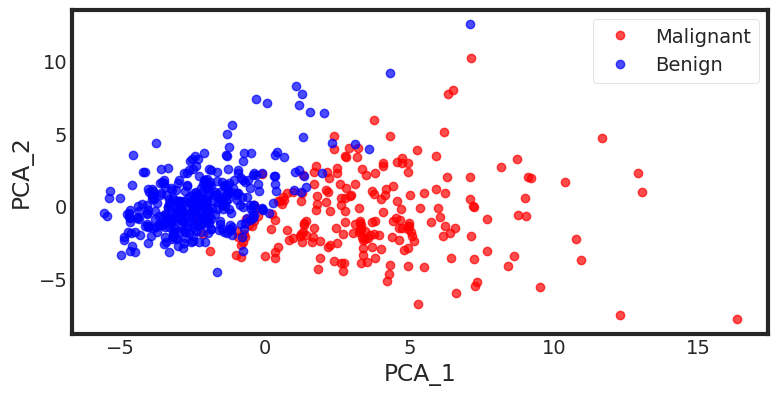

In [34]:
X_pca = pca.transform(Xs)
PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:, 0]
PCA_df['PCA_2'] = X_pca[:, 1]

plt.plot(PCA_df['PCA_1'][data.diagnosis == 'M'], PCA_df['PCA_2'][data.diagnosis == 'M'], 'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.diagnosis == 'B'], PCA_df['PCA_2'][data.diagnosis == 'B'], 'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant', 'Benign'])
plt.show()

So now we have applied the linear PCA transformation and we got a lower dimensional subspace(from 3D to 2D in this case), where the samples are "most spread" along the new feature axes.

In [35]:
#the amount of variance that each PC explains
var = pca.explained_variance_ratio_
#cumulative variance explained
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
print(var1)

[44.27 63.24 72.63 79.23 84.73 88.75 91.   92.59 93.98 95.15]


3.5 Deciding how many Principal Components to retain

Lets summarise the results of our Principal Component Analysis by making a scree plot.

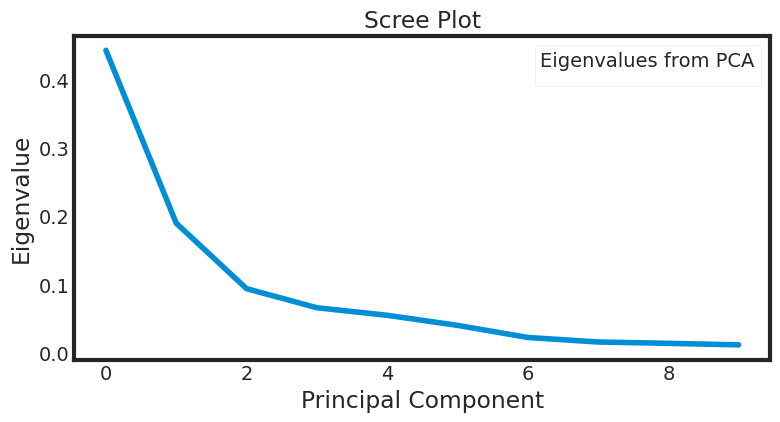

In [36]:
plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(title='Eigenvalues from PCA', loc='best', borderpad=0.3, shadow=False, markerscale=0.4)

leg.get_frame().set_alpha(0.4)
leg.set_draggable(True)
plt.show()

Observation

The most obvious change in slope in the scree plot occurs at component 2, which is the "elbow" of the scree plot. Therefore, it could be argued on the basis of the scree plot that the first three components should be retained.

The Summary of the Data Pre-Processing approach used here:

1. assigned features to a NumPy array X, and transformed the class labels from their original string representation(M and B) into integers.
2. Splitted the data into trainig and testing sets.
3. Standardized the data.
4. Obtained the Eigenvectors and Eigenvalues from the covariance(or correlation) matrix.
5. Sorted the eigenvalues in descending order and chose the kk eigenvectors that corresponded to the kk largest eigenvalues where k is the number of dimensions of the new feature subspace (k<=dk<=d).
6. Constructed the projection matrix W from the selected eigenvectors.
7. Transformed the original dataset X via W to obtain a k-dimensional feature subspace Y.

4. Predictive Model using SVM(Support Vector Machine)



Here we'll build the predictive model. SVM transforms nonlinear data so that one can use a linear algorithm to fit a linear model to the data.
Kernelized support vector machines are powerful models and perform well on a variety of datasets.




4.1 Important Parameters


The important parameters in kernel SVMs are the:
+ Regularization parameter C,
+ The choice of kernel(linear, radial basis function(RBF) or polynomial),
+ Kernel-specific parameters.

gamma and C both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are usually strongly correlated, and C and gamma should be adjusted together.




In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn import metrics, preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [38]:
#create an SVM classifier and train it on 70% of the dataset.
clf = SVC(probability = True)
clf.fit(X_train, y_train)

#analyse accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))


The classifier accuracy score is 0.93



We can successively split the data into folds that we'll use for training and testing:

In [39]:
#getting average of 3-fold cross-validation score using SVC estimator
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv = n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))



The 3-fold cross-validation accuracy score for this classifier is 0.97



The above evaluation was based on usign the entire set of features.

Now, lets employ the correlation-based feature selection stratergy to assess the effect of using 3 features which have the best correlation with the class labels.

In [40]:
from sklearn.feature_selection import SelectKBest, f_regression
clf2 = make_pipeline(SelectKBest(f_regression, k =3), SVC(probability = True))

scores = cross_val_score(clf2, Xs, y, cv = 3)

#getting average of 3 fold cv score using a SVC estimator.
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv = n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))


The 3-fold cross-validation accuracy score for this classifier is 0.97



In [41]:
print(scores)
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and uncertainity: ({:.2f} +- {:.3f})%%".format(*avg))
# Use .format(*avg) to unpack the tuple

[0.93157895 0.95263158 0.94179894]
Average score and uncertainity: (94.20 +- 0.496)%%


From this we can see that only a fraction of features are required to build a model that performs similarly to models based on using the entire set of features. This is why feature selection is an important part of the model-building process. In the rest of the analysis, we'llcontinue using the entire set of features.

4.2 Model Accuracy: ROC(Receiver Operating Characteristics) Curve

In [42]:
#using confusion matrix to help visualize the performance of the algorithm
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[98  0]
 [10 35]]


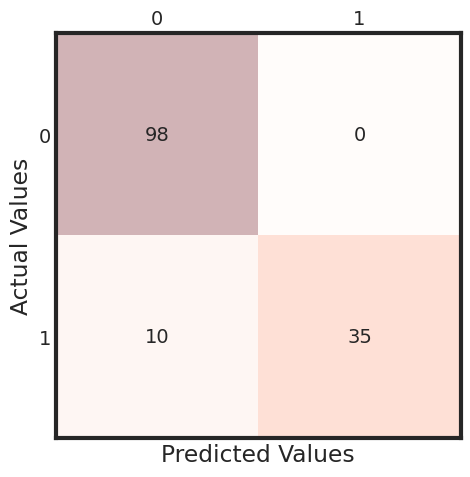

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        98
           1       1.00      0.78      0.88        45

    accuracy                           0.93       143
   macro avg       0.95      0.89      0.91       143
weighted avg       0.94      0.93      0.93       143



In [43]:
from IPython.display import Image, display
fig, ax = plt.subplots(figsize = (5,5))
ax.matshow(cm, cmap = plt.cm.Reds, alpha = 0.3)
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(x = j, y = i, s = cm[i,j], va = 'center', ha = 'center')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred))

Observation:
+ The classifier made a total of 143 predictions(i.e. 143 patients were being tested for the presence breast cancer).
+ Out of those 143 cases, the classifier predicted "yes" 35 times and "no" 108 times.
+ In reality, 45 patients have the disease and 98 patients do not.


Rates as computed from the confusion matrix

1. Accuracy: Overall, how often is the classifier correct?
  + (TP + TN)/total = (35 + 98)/143= 0.93
2. Misclassification Rate(Error Rate): Overall, how often it is wrong?
  + (FP + FN)/total = (10 + 0)/143= 0.07 (equivalent to (1 - Accuracy))
3. True Positive Rate("Sensitivity" or "Recall"): When it's actually 1, how often does it predict 1?
  + TP/actual yes = 35/45 = 0.78
4. False Positive Rate: When it's actually 0, how often does it predict 1?
  + FP/actual no = 0/98 = 0
5. True Negative Rate("Specificity"): When it's actually 0, how often does it predict 0?
  + TN/actual no = 98/98 = 1(equivalent to (1 - False Positive))
6. Precision: When it presicts 1, how often is it correct?
  + TP/predicted yes = 35/35 = 1
7. Prevalence: How often does the yes condition actually occur in our sample?
  + actual yes/total = 45/143 = 0.31

Text(0.5, 1.0, 'Receiver operating characteristic example')

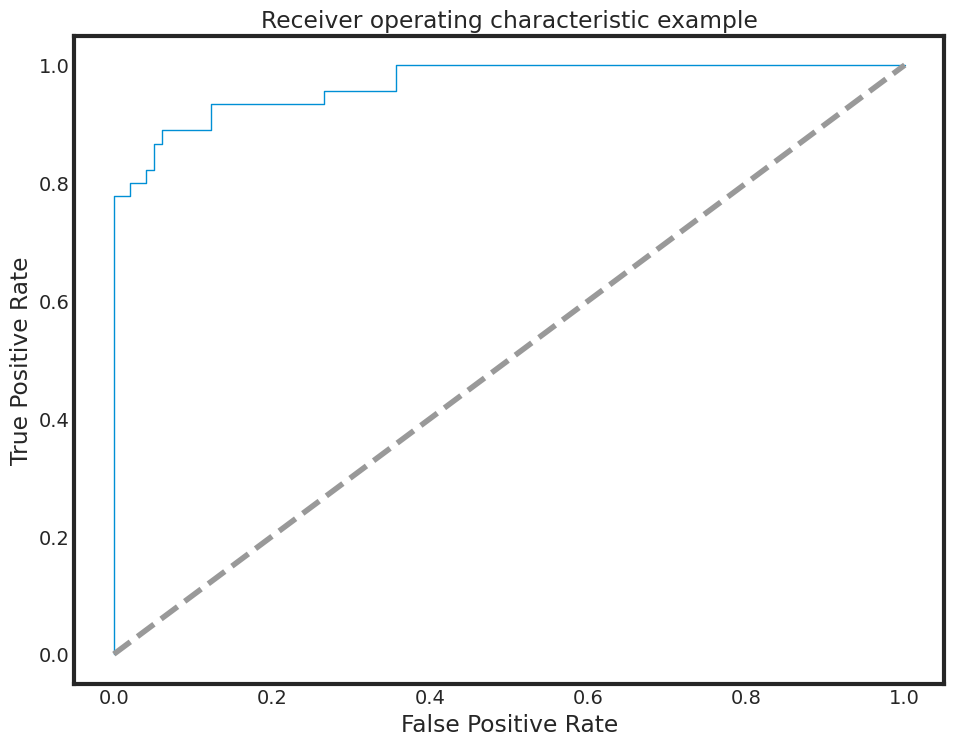

In [44]:
from sklearn.metrics import roc_curve, auc

#plot the ROC curve
plt.figure(figsize = (10,8))
probas_ = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
#plt.axes().set_aspect(1)

Observation:

+ Here, there is an equal chance of "+" and "-" happening. Therefore, this is not that different from making a prediction by tossing of an unbiased coin. Put simply, the classification model is random.
+ For the points above the diagonal, tpr>fpr and then model says that you are in a zone where you are performing better than random. Furthermore, holding fpr constant, it is easy to see that the more vertically above the diagonal you are positioned, the better the classification model.

5. Optimizing the SVM Classifier

ML models are parameterised so that their behaviour can be tuned according to a given problem. Here we'll tune parameters of the SVM Classification model using Scikit-learn.

In [45]:
plt.rcParams['figure.figsize'] = (8,4)

Building a predicitve model and evaluating with 5-cross validation using support vector classifier

In [46]:
X

array([[17.99, 10.38, 122.8, ..., 0.2654, 0.4601, 0.1189],
       [20.57, 17.77, 132.9, ..., 0.186, 0.275, 0.08902],
       [19.69, 21.25, 130.0, ..., 0.243, 0.3613, 0.08758],
       ...,
       [16.6, 28.08, 108.3, ..., 0.1418, 0.2218, 0.0782],
       [20.6, 29.33, 140.1, ..., 0.265, 0.4087, 0.124],
       [7.76, 24.54, 47.92, ..., 0.0, 0.2871, 0.07039]], dtype=object)


The 5-fold cross-validation accuracy score for this classifier is 0.98

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        98
           1       1.00      0.78      0.88        45

    accuracy                           0.93       143
   macro avg       0.95      0.89      0.91       143
weighted avg       0.94      0.93      0.93       143



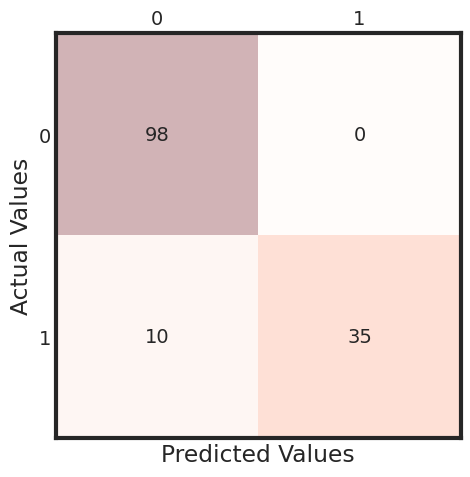

In [47]:
#get average of 5-fold cross-validation score using an SVC estimator
n_folds = 5
cv_error = np.average(cross_val_score(SVC(), X_pca, y, cv = n_folds))
print ('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))

y_pred = clf.fit(X_train, y_train).predict(X_test) # Fixed syntax error here
cm = metrics.confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j],
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

Importance of optimizing a classifier

We can tune 2 key parameters of the SVM algorithm:
+ the value of C(how much to relax the margin) and
+ the type of kernel.

The default for SVM (the SVC class) is to use the Radial Basis Function (RBF) kernel with a C value set to 1.0. Like with KNN, we will perform a grid search using 10-fold cross validation with a standardized copy of the training dataset. We will try a number of simpler kernel types and C values with less bias and more bias (less than and more than 1.0 respectively).

Python scikit-learn provides two simple methods for algorithm parameter tuning:

+ Grid Search parameter tuning
+ Random Search parameter tuning


5.1 Decision Boundaries of different classifiers

Let's see the decision boundaries produced by the linear, gaussian and polynomial classifiers.

In [51]:
from matplotlib.colors import ListedColormap
from sklearn import svm
def decision_plot(X_train, y_train, n_neighbors, weights):
  h = .02  #step size in mesh

#we only take the first two features
Xtrain = X_train[:, :2]

#creating color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#we'll create an instance of SVM and fit our data
#we'll not scale our data since we want to plot the support vectors

#SVM regularisation parameter
C = 1.0

svm = SVC(kernel = 'linear', random_state = 0, gamma = 0.1, C = C).fit(Xtrain, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(Xtrain, y_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(Xtrain, y_train)

In [52]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.rcParams['axes.titlesize'] = 'large'

    # create a mesh to plot in
x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

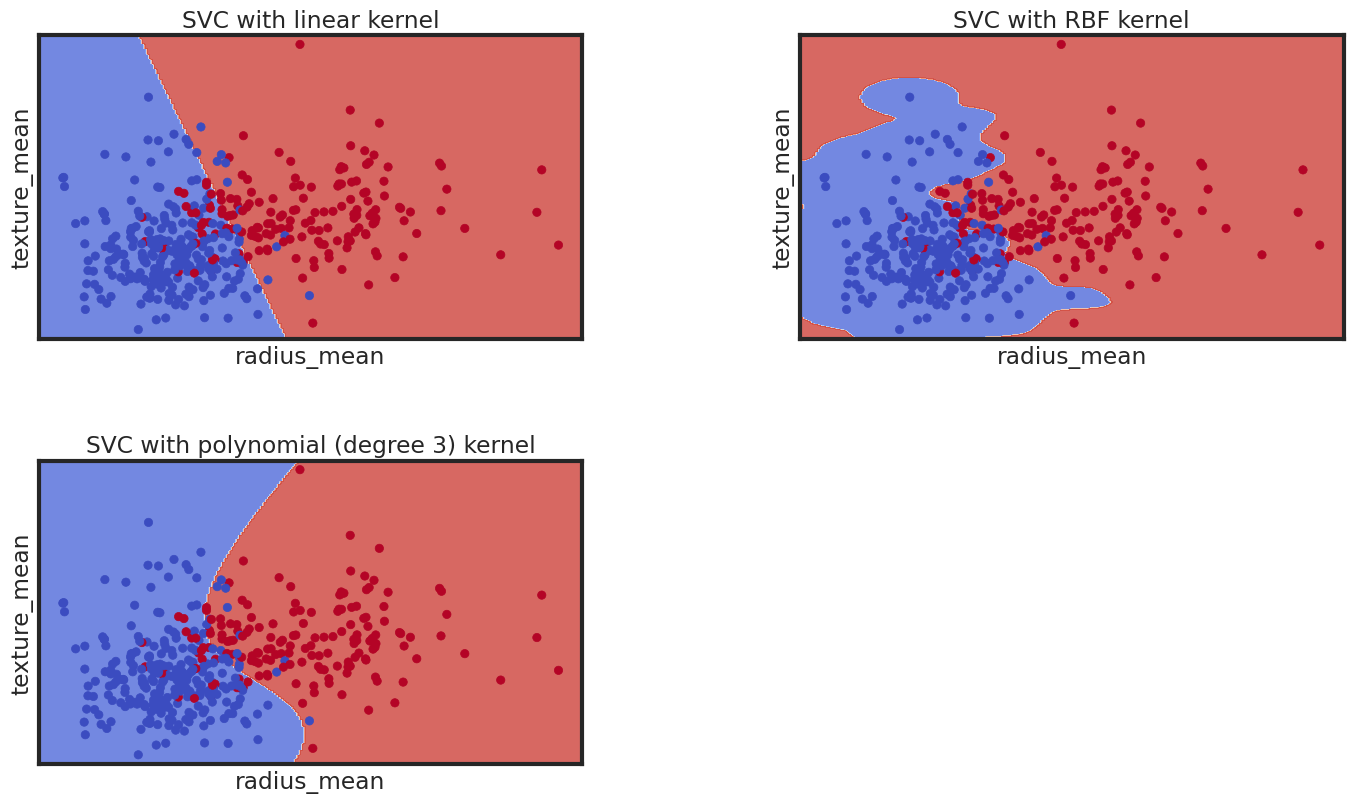

In [53]:
for i, clf in enumerate((svm, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

Conclusion

This work demonstrates the modelling of breast cancer as classification task using Support Vector Machine

The SVM performs better when the dataset is standardized so that all attributes have a mean value of zero and a standard deviation of one. We can calculate this from the entire training dataset and apply the same transform to the input attributes from the validation dataset.